In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-03-25 10:05:34.589357: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 21s 754ms/step - accuracy: 0.1719 - loss: 1.5972
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2653 - loss: 1.5127 - val_accuracy: 0.3409 - val_loss: 1.3693
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.2891 - loss: 1.4311
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3218 - loss: 1.3804 - val_accuracy: 0.3851 - val_loss: 1.2809
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3906 - loss: 1.3263
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3671 - loss: 1.3087 - val_accuracy: 0.4185 - val_loss: 1.2112
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.3984 - loss: 1.2606
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3792 - loss: 1.2466 - val_accuracy: 0.4896 - val_loss: 1.1561
Epoch 5/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.4062 - loss: 1.1503
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4157 - loss: 1.1878 - val_accuracy: 0.5823 - val_loss: 1.1051
Epoch 6/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.4609 - loss: 1.1524
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4609 - loss: 1.1532 - val_accuracy: 0.6157 - val_loss: 1.0569
Epoch 7/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.3438 - loss: 1.2083
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4405 - loss: 1.1318 - val_accuracy: 0.6291 - val_loss: 1.0075
Epoch 8/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.4375 - loss: 1.0854
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4541 - loss: 1.1013 - val_accuracy: 0.6767 - val_loss: 0.9573
Epoch 9/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5234 - loss: 1.0795
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5054 - loss: 1.0645 - val_accuracy: 0.7352 - val_loss: 0.9089
Epoch 10/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5078 - loss: 1.0843
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5157 - loss: 1.0393 - val_accuracy: 0.7644 - val_loss: 0.8620
Epoch 11/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5078 - loss: 1.0367
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5316 - loss: 1.0085 - val_accuracy: 0.8012 - val_loss: 0.8124
Epoch 12/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5938 - loss: 0.8895
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5567 - loss: 0.9599 - val_accuracy: 0.8421 - val_loss: 0.7713
Epoch 13/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5781 - loss: 0.9778
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5873 - loss: 0.9344 - val_accuracy: 0.8363 - val_loss: 0.7317
Epoch 14/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6094 - loss: 0.9258
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5988 - loss: 0.9182 - val_accuracy: 0.8638 - val_loss: 0.6978
Epoch 15/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5625 - loss: 0.9116
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5906 - loss: 0.8985 - val_accuracy: 0.8688 - val_loss: 0.6689
Epoch 16/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6641 - loss: 0.8481
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6197 - loss: 0.8766 - val_accuracy: 0.8697 - val_loss: 0.6392
Epoch 17/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5859 - loss: 0.8797
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6259 - loss: 0.8514 - val_accuracy: 0.8906 - val_loss: 0.6037
Epoch 18/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6250 - loss: 0.8059
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6278 - loss: 0.8378 - val_accuracy: 0.8956 - val_loss: 0.5784
Epoch 19/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7266 - loss: 0.7723
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6674 - loss: 0.7950 - val_accuracy: 0.9006 - val_loss: 0.5591
Epoch 20/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6875 - loss: 0.7735
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6496 - loss: 0.8149 - val_accuracy: 0.9048 - val_loss: 0.5393
Epoch 21/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.6484 - loss: 0.8053
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6609 - loss: 0.8035 - val_accuracy: 0.9048 - val_loss: 0.5244
Epoch 22/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.6875 - loss: 0.7482
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6728 - loss: 0.7715 - val_accuracy: 0.9140 - val_loss: 0.5116
Epoch 23/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7656 - loss: 0.6781
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6879 - loss: 0.7715 - val_accuracy: 0.9156 - val_loss: 0.4995
Epoch 24/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.6406 - loss: 0.8057
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6843 - loss: 0.7695 - val_accuracy: 0.9156 - val_loss: 0.4788
Epoch 25/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6953 - loss: 0.6957
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6807 - loss: 0.7430 - val_accuracy: 0.9131 - val_loss: 0.4660
Epoch 26/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6562 - loss: 0.7418
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6834 - loss: 0.7397 - val_accuracy: 0.9173 - val_loss: 0.4520
Epoch 27/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7422 - loss: 0.6918
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6967 - loss: 0.7389 - val_accuracy: 0.9223 - val_loss: 0.4374
Epoch 28/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7109 - loss: 0.6655
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7060 - loss: 0.6937 - val_accuracy: 0.9315 - val_loss: 0.4247
Epoch 29/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6875 - loss: 0.8156
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7070 - loss: 0.7277 - val_accuracy: 0.9298 - val_loss: 0.4156
Epoch 30/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6953 - loss: 0.7031
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7178 - loss: 0.6982 - val_accuracy: 0.9298 - val_loss: 0.4071
Epoch 31/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7188 - loss: 0.7484
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7231 - loss: 0.6820 - val_accuracy: 0.9365 - val_loss: 0.3961
Epoch 32/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7344 - loss: 0.6838
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7222 - loss: 0.6976 - val_accuracy: 0.9390 - val_loss: 0.3887
Epoch 33/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7344 - loss: 0.6275
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7181 - loss: 0.6865 - val_accuracy: 0.9382 - val_loss: 0.3823
Epoch 34/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7344 - loss: 0.7112
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7309 - loss: 0.6719 - val_accuracy: 0.9365 - val_loss: 0.3707
Epoch 35/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7500 - loss: 0.6402
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7345 - loss: 0.6479 - val_accuracy: 0.9390 - val_loss: 0.3640
Epoch 36/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7812 - loss: 0.5950
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7622 - loss: 0.6288 - val_accuracy: 0.9465 - val_loss: 0.3505
Epoch 37/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.6953 - loss: 0.6251
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7413 - loss: 0.6418 - val_accuracy: 0.9424 - val_loss: 0.3460
Epoch 38/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7578 - loss: 0.6265
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7485 - loss: 0.6230 - val_accuracy: 0.9457 - val_loss: 0.3401
Epoch 39/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7656 - loss: 0.5711
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7589 - loss: 0.6138 - val_accuracy: 0.9474 - val_loss: 0.3317
Epoch 40/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7734 - loss: 0.6089
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7661 - loss: 0.6132 - val_accuracy: 0.9524 - val_loss: 0.3320
Epoch 41/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.7509
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7479 - loss: 0.6472 - val_accuracy: 0.9524 - val_loss: 0.3324
Epoch 42/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8203 - loss: 0.5822
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7661 - loss: 0.6218 - val_accuracy: 0.9499 - val_loss: 0.3274
Epoch 43/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8047 - loss: 0.6211
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7612 - loss: 0.6124 - val_accuracy: 0.9549 - val_loss: 0.3232
Epoch 44/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8047 - loss: 0.5307
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7711 - loss: 0.5944 - val_accuracy: 0.9557 - val_loss: 0.3204
Epoch 45/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7422 - loss: 0.6614
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7526 - loss: 0.6304 - val_accuracy: 0.9532 - val_loss: 0.3154
Epoch 46/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7891 - loss: 0.5769
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7772 - loss: 0.5878 - val_accuracy: 0.9541 - val_loss: 0.3062
Epoch 47/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7969 - loss: 0.5547
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7809 - loss: 0.5762 - val_accuracy: 0.9591 - val_loss: 0.3012
Epoch 48/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7969 - loss: 0.4829
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7695 - loss: 0.5839 - val_accuracy: 0.9507 - val_loss: 0.2991
Epoch 49/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7578 - loss: 0.5450
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7693 - loss: 0.5846 - val_accuracy: 0.9582 - val_loss: 0.2953
Epoch 50/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6875 - loss: 0.6820
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7557 - loss: 0.6071 - val_accuracy: 0.9549 - val_loss: 0.2926
Epoch 51/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7812 - loss: 0.6330
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7853 - loss: 0.5876 - val_accuracy: 0.9616 - val_loss: 0.2889
Epoch 52/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8203 - loss: 0.4970
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7784 - loss: 0.5833 - val_accuracy: 0.9599 - val_loss: 0.2791
Epoch 53/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7500 - loss: 0.6767
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7802 - loss: 0.5686 - val_accuracy: 0.9582 - val_loss: 0.2811
Epoch 54/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7969 - loss: 0.6167
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7798 - loss: 0.5850 - val_accuracy: 0.9582 - val_loss: 0.2764
Epoch 55/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.6044
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7874 - loss: 0.5595 - val_accuracy: 0.9591 - val_loss: 0.2794
Epoch 56/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7891 - loss: 0.5075
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7899 - loss: 0.5608 - val_accuracy: 0.9624 - val_loss: 0.2766
Epoch 57/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8125 - loss: 0.5366
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7916 - loss: 0.5455 - val_accuracy: 0.9599 - val_loss: 0.2697
Epoch 58/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8047 - loss: 0.5414
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7873 - loss: 0.5657 - val_accuracy: 0.9683 - val_loss: 0.2638
Epoch 59/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8125 - loss: 0.4666
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7903 - loss: 0.5387 - val_accuracy: 0.9591 - val_loss: 0.2659
Epoch 60/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8438 - loss: 0.4589
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7851 - loss: 0.5526 - val_accuracy: 0.9591 - val_loss: 0.2640
Epoch 61/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7656 - loss: 0.6601
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7759 - loss: 0.5796 - val_accuracy: 0.9574 - val_loss: 0.2676
Epoch 62/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.5754
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7871 - loss: 0.5526 - val_accuracy: 0.9666 - val_loss: 0.2641
Epoch 63/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7891 - loss: 0.6668
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7998 - loss: 0.5461 - val_accuracy: 0.9641 - val_loss: 0.2561
Epoch 64/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7969 - loss: 0.4864
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7986 - loss: 0.5409 - val_accuracy: 0.9699 - val_loss: 0.2534
Epoch 65/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8828 - loss: 0.4088
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7963 - loss: 0.5546 - val_accuracy: 0.9683 - val_loss: 0.2526
Epoch 66/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7500 - loss: 0.5639
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7810 - loss: 0.5536 - val_accuracy: 0.9649 - val_loss: 0.2595
Epoch 67/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7656 - loss: 0.4989
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7951 - loss: 0.5259 - val_accuracy: 0.9649 - val_loss: 0.2561
Epoch 68/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7969 - loss: 0.5358
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7890 - loss: 0.5395 - val_accuracy: 0.9641 - val_loss: 0.2594
Epoch 69/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8047 - loss: 0.5079
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7915 - loss: 0.5462 - val_accuracy: 0.9616 - val_loss: 0.2582
Epoch 70/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7500 - loss: 0.5620
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7862 - loss: 0.5489 - val_accuracy: 0.9641 - val_loss: 0.2541
Epoch 71/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7969 - loss: 0.5582
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7880 - loss: 0.5531 - val_accuracy: 0.9632 - val_loss: 0.2531
Epoch 72/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8203 - loss: 0.4459
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8049 - loss: 0.5149 - val_accuracy: 0.9616 - val_loss: 0.2509
Epoch 73/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7734 - loss: 0.5779
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7851 - loss: 0.5562 - val_accuracy: 0.9649 - val_loss: 0.2442
Epoch 74/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7422 - loss: 0.7755
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7856 - loss: 0.5710 - val_accuracy: 0.9674 - val_loss: 0.2548
Epoch 75/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8594 - loss: 0.4432
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8107 - loss: 0.5290 - val_accuracy: 0.9616 - val_loss: 0.2455
Epoch 76/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8125 - loss: 0.4631
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7945 - loss: 0.5244 - val_accuracy: 0.9624 - val_loss: 0.2460
Epoch 77/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7344 - loss: 0.6174
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7918 - loss: 0.5274 - val_accuracy: 0.9649 - val_loss: 0.2407
Epoch 78/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.7656 - loss: 0.5303
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7933 - loss: 0.5360 - val_accuracy: 0.9632 - val_loss: 0.2510
Epoch 79/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7734 - loss: 0.5698
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7949 - loss: 0.5376 - val_accuracy: 0.9657 - val_loss: 0.2438
Epoch 80/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7969 - loss: 0.5105
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8164 - loss: 0.4919 - val_accuracy: 0.9691 - val_loss: 0.2377
Epoch 81/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7422 - loss: 0.5594
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8028 - loss: 0.5093 - val_accuracy: 0.9724 - val_loss: 0.2310
Epoch 82/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8125 - loss: 0.5164
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8053 - loss: 0.5154 - val_accuracy: 0.9666 - val_loss: 0.2394
Epoch 83/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7578 - loss: 0.5937
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7886 - loss: 0.5353 - val_accuracy: 0.9691 - val_loss: 0.2398
Epoch 84/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8125 - loss: 0.5137
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8045 - loss: 0.5149 - val_accuracy: 0.9666 - val_loss: 0.2430
Epoch 85/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7969 - loss: 0.5524
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8132 - loss: 0.5059 - val_accuracy: 0.9657 - val_loss: 0.2469
Epoch 86/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7812 - loss: 0.5088
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7991 - loss: 0.5260 - val_accuracy: 0.9607 - val_loss: 0.2371
Epoch 87/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8750 - loss: 0.4237
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8170 - loss: 0.5020 - val_accuracy: 0.9691 - val_loss: 0.2418
Epoch 88/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7969 - loss: 0.5660
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8043 - loss: 0.5217 - val_accuracy: 0.9616 - val_loss: 0.2414
Epoch 89/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8359 - loss: 0.4036
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8038 - loss: 0.5108 - val_accuracy: 0.9683 - val_loss: 0.2345
Epoch 90/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8203 - loss: 0.4325
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8104 - loss: 0.4989 - val_accuracy: 0.9683 - val_loss: 0.2311
Epoch 91/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7656 - loss: 0.6450
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8044 - loss: 0.5240 - val_accuracy: 0.9666 - val_loss: 0.2305
Epoch 92/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7891 - loss: 0.5531
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8178 - loss: 0.4949 - val_accuracy: 0.9716 - val_loss: 0.2254
Epoch 93/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8281 - loss: 0.4874
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8059 - loss: 0.5234 - val_accuracy: 0.9666 - val_loss: 0.2274
Epoch 94/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8672 - loss: 0.4262
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8302 - loss: 0.4759 - val_accuracy: 0.9666 - val_loss: 0.2300
Epoch 95/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7734 - loss: 0.5511
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8094 - loss: 0.5191 - val_accuracy: 0.9683 - val_loss: 0.2275
Epoch 96/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8203 - loss: 0.4922
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8085 - loss: 0.5135 - val_accuracy: 0.9666 - val_loss: 0.2268
Epoch 97/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8125 - loss: 0.5144
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8111 - loss: 0.4957 - val_accuracy: 0.9699 - val_loss: 0.2261
Epoch 98/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7656 - loss: 0.5980
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8052 - loss: 0.5185 - val_accuracy: 0.9683 - val_loss: 0.2248
Epoch 99/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.8203 - loss: 0.5063
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8154 - loss: 0.4835 - val_accuracy: 0.9683 - val_loss: 0.2259
Epoch 100/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7734 - loss: 0.5460
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8035 - loss: 0.5019 - val_accuracy: 0.9691 - val_loss: 0.2279
Epoch 101/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8281 - loss: 0.5561
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8241 - loss: 0.4853 - val_accuracy: 0.9674 - val_loss: 0.2245
Epoch 102/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8594 - loss: 0.4232
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8238 - loss: 0.4902 - val_accuracy: 0.9708 - val_loss: 0.2214
Epoch 103/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8438 - loss: 0.4358
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8139 - loss: 0.5102 - val_accuracy: 0.9657 - val_loss: 0.2290
Epoch 104/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8125 - loss: 0.4596
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8214 - loss: 0.4739 - val_accuracy: 0.9657 - val_loss: 0.2261
Epoch 105/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7734 - loss: 0.6576
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8115 - loss: 0.5101 - val_accuracy: 0.9674 - val_loss: 0.2218
Epoch 106/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7109 - loss: 0.7333
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7994 - loss: 0.5314 - val_accuracy: 0.9716 - val_loss: 0.2183
Epoch 107/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8438 - loss: 0.4165
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8234 - loss: 0.4692 - val_accuracy: 0.9674 - val_loss: 0.2188
Epoch 108/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8281 - loss: 0.4369
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8130 - loss: 0.5113 - val_accuracy: 0.9599 - val_loss: 0.2191
Epoch 109/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8047 - loss: 0.5112
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8061 - loss: 0.4972 - val_accuracy: 0.9699 - val_loss: 0.2180
Epoch 110/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7891 - loss: 0.5706
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8128 - loss: 0.4993 - val_accuracy: 0.9674 - val_loss: 0.2145
Epoch 111/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8438 - loss: 0.4283
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8154 - loss: 0.4990 - val_accuracy: 0.9649 - val_loss: 0.2214
Epoch 112/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8047 - loss: 0.4910
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8039 - loss: 0.4987 - val_accuracy: 0.9691 - val_loss: 0.2203
Epoch 113/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8359 - loss: 0.4608
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.5086 - val_accuracy: 0.9716 - val_loss: 0.2182
Epoch 114/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8047 - loss: 0.4521
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8216 - loss: 0.4586 - val_accuracy: 0.9666 - val_loss: 0.2142
Epoch 115/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8281 - loss: 0.4682
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8280 - loss: 0.4676 - val_accuracy: 0.9599 - val_loss: 0.2200
Epoch 116/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7734 - loss: 0.5891
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7997 - loss: 0.5203 - val_accuracy: 0.9649 - val_loss: 0.2167
Epoch 117/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8672 - loss: 0.4213
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8253 - loss: 0.4869 - val_accuracy: 0.9632 - val_loss: 0.2145
Epoch 118/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7891 - loss: 0.5240
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8210 - loss: 0.4788 - val_accuracy: 0.9691 - val_loss: 0.2104
Epoch 119/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8516 - loss: 0.4192
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8447 - loss: 0.4401 - val_accuracy: 0.9641 - val_loss: 0.2110
Epoch 120/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8125 - loss: 0.5022
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8246 - loss: 0.4794 - val_accuracy: 0.9716 - val_loss: 0.2160
Epoch 121/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8594 - loss: 0.3723
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8215 - loss: 0.4581 - val_accuracy: 0.9641 - val_loss: 0.2135
Epoch 122/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8281 - loss: 0.4008
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8242 - loss: 0.4641 - val_accuracy: 0.9657 - val_loss: 0.2178
Epoch 123/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8828 - loss: 0.3774
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8379 - loss: 0.4601 - val_accuracy: 0.9641 - val_loss: 0.2119
Epoch 124/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8438 - loss: 0.4077
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8182 - loss: 0.4880 - val_accuracy: 0.9683 - val_loss: 0.2146
Epoch 125/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8672 - loss: 0.4500
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8280 - loss: 0.4717 - val_accuracy: 0.9649 - val_loss: 0.2162
Epoch 126/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8203 - loss: 0.4786
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8386 - loss: 0.4430 - val_accuracy: 0.9674 - val_loss: 0.2146
Epoch 127/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8281 - loss: 0.4877
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8287 - loss: 0.4652 - val_accuracy: 0.9691 - val_loss: 0.2150
Epoch 128/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8281 - loss: 0.4585
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8199 - loss: 0.4652 - val_accuracy: 0.9649 - val_loss: 0.2184
Epoch 129/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8750 - loss: 0.3602
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8401 - loss: 0.4354 - val_accuracy: 0.9691 - val_loss: 0.2073
Epoch 130/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8438 - loss: 0.4853
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8277 - loss: 0.4628 - val_accuracy: 0.9699 - val_loss: 0.2069
Epoch 131/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8281 - loss: 0.4362
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8311 - loss: 0.4563 - val_accuracy: 0.9649 - val_loss: 0.2024
Epoch 132/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8906 - loss: 0.3571
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8305 - loss: 0.4610 - val_accuracy: 0.9683 - val_loss: 0.2081
Epoch 133/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7734 - loss: 0.5016
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8210 - loss: 0.4645 - val_accuracy: 0.9674 - val_loss: 0.2080
Epoch 134/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8516 - loss: 0.4196
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8242 - loss: 0.4736 - val_accuracy: 0.9691 - val_loss: 0.2113
Epoch 135/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8359 - loss: 0.3843
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8228 - loss: 0.4706 - val_accuracy: 0.9674 - val_loss: 0.2109
Epoch 136/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8047 - loss: 0.5177
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8233 - loss: 0.4759 - val_accuracy: 0.9641 - val_loss: 0.2069
Epoch 137/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8594 - loss: 0.3811
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8196 - loss: 0.4589 - val_accuracy: 0.9674 - val_loss: 0.2078
Epoch 138/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.8125 - loss: 0.5747
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8119 - loss: 0.4911 - val_accuracy: 0.9666 - val_loss: 0.2096
Epoch 139/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8125 - loss: 0.4674
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8338 - loss: 0.4536 - val_accuracy: 0.9674 - val_loss: 0.2103
Epoch 140/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8203 - loss: 0.4919
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8176 - loss: 0.4913 - val_accuracy: 0.9666 - val_loss: 0.2168
Epoch 141/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8516 - loss: 0.4308
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8372 - loss: 0.4561 - val_accuracy: 0.9616 - val_loss: 0.2114
Epoch 142/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7969 - loss: 0.4482
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8131 - loss: 0.4867 - val_accuracy: 0.9632 - val_loss: 0.2080
Epoch 143/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7969 - loss: 0.5044
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8233 - loss: 0.4782 - val_accuracy: 0.9691 - val_loss: 0.2079
Epoch 144/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7734 - loss: 0.4779
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8233 - loss: 0.4768 - val_accuracy: 0.9649 - val_loss: 0.2116
Epoch 145/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8828 - loss: 0.3977
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8290 - loss: 0.4571 - val_accuracy: 0.9657 - val_loss: 0.2049
Epoch 146/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7578 - loss: 0.5917
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8185 - loss: 0.4765 - val_accuracy: 0.9699 - val_loss: 0.2053
Epoch 147/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8203 - loss: 0.4660
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8181 - loss: 0.4852 - val_accuracy: 0.9649 - val_loss: 0.2042
Epoch 148/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8438 - loss: 0.3835
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8197 - loss: 0.4516 - val_accuracy: 0.9691 - val_loss: 0.2088
Epoch 149/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8516 - loss: 0.3904
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8278 - loss: 0.4515 - val_accuracy: 0.9666 - val_loss: 0.2086
Epoch 150/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8516 - loss: 0.4268
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8232 - loss: 0.4687 - val_accuracy: 0.9657 - val_loss: 0.2043
Epoch 151/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.7500 - loss: 0.6551
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8156 - loss: 0.4984 - val_accuracy: 0.9674 - val_loss: 0.2048
Epoch 151: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9681 - loss: 0.2008 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[9.6104985e-01 3.8877435e-02 6.0146922e-05 1.2620351e-05 1.0098422e-10]
0


# Confusion matrix

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


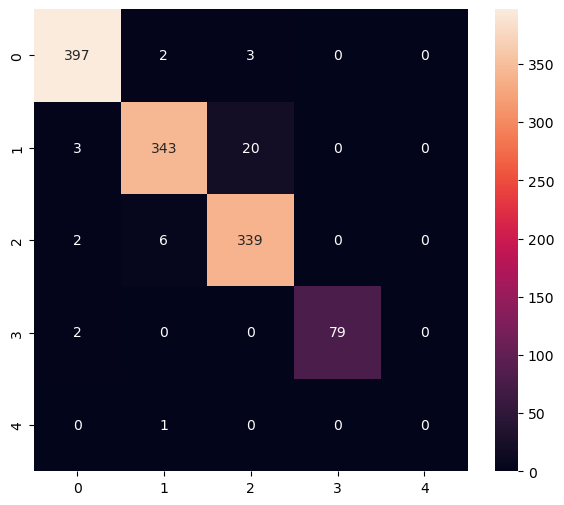

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       402
           1       0.97      0.94      0.96       366
           2       0.94      0.98      0.96       347
           3       1.00      0.98      0.99        81
           4       0.00      0.00      0.00         1

    accuracy                           0.97      1197
   macro avg       0.78      0.78      0.78      1197
weighted avg       0.97      0.97      0.97      1197



/opt/miniforge3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniforge3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniforge3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp5swvsc0y/assets


INFO:tensorflow:Assets written to: /tmp/tmp5swvsc0y/assets


Saved artifact at '/tmp/tmp5swvsc0y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140377120392784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377120394512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377120393552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377120396432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377120396240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140377120397200: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-03-25 10:06:32.755578: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp5swvsc0y
2025-03-25 10:06:32.756060: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-03-25 10:06:32.756070: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp5swvsc0y
2025-03-25 10:06:32.792592: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-03-25 10:06:32.813069: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp5swvsc0y
2025-03-25 10:06:32.819484: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 63907 microseconds.
2025-03-25 10:06:32.828785: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6600

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 66 μs, sys: 63 μs, total: 129 μs
Wall time: 127 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6104985e-01 3.8877379e-02 6.0146864e-05 1.2620301e-05 1.0098402e-10]
0
